In [1]:
import torch
import torch.nn as nn
import numpy as np
from tree import sample_tree_from_logits
import matplotlib.pyplot as plt

In [5]:
n = 6
adj = torch.randn(n*(n-1)//2).cuda().flatten()
adj_in = nn.Parameter(adj, requires_grad=True)

In [6]:


S_soft = sample_tree_from_logits(adj_in, 0.1, False, np.inf, "cuda")
S_hard = sample_tree_from_logits(adj_in, 0.1, True, np.inf, "cuda")

adj_sq = torch.zeros((n,n)).cuda()
vertices = torch.triu_indices(n, n, offset=1)
adj_sq[vertices[0], vertices[1]] = adj

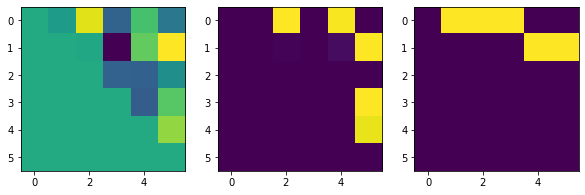

In [7]:
fig, axs = plt.subplots(ncols=3, figsize = (10,4))

axs[0].imshow(adj_sq.cpu().detach().numpy())
axs[1].imshow(S_soft.cpu().detach().numpy())
axs[2].imshow(S_hard.cpu().detach().numpy())